In [15]:
import numpy as np
#import random
import matplotlib.pyplot as plt
import csv

In [21]:
# --- 1. Problem Definition (from your prompt) ---

def Easom(x,y):
    return np.cos(x) * np.cos(y) * np.exp(-((x - np.pi)**2 + (y - np.pi)**2))

# def fitness_function(xx, yy): # four target with ratio
#     x1 = (xx-150)/200
#     y1 = (yy-150)/200
#     z1 = Easom(x1,y1)
#     x2 = (xx-150)/200
#     y2 = (yy+400)/200
#     z2 = Easom(x2,y2)
#     x3 = (xx+400)/200
#     y3 = (yy+400)/200
#     z3 = Easom(x3,y3)
#     x4 = (xx+400)/200
#     y4 = (yy-150)/200
#     z4 = Easom(x4,y4)
#     return z1 + 0.7*z2 + 0.5*z3 + 0.7*z4
# clusters_num = 4
# clusters = np.array([[228.3,228.3],[778.3,228.3],[228.3,778.3],[778.3,778.3]])

# def fitness_function(xx, yy): # 2 targets
#     x1 = (xx-500)/100
#     y1 = (yy-500)/100
#     z1 = Easom(x1,y1)
#     x4 = (xx+100)/100
#     y4 = (yy+100)/100
#     z4 = Easom(x4,y4)
#     return z1 + z4
# clusters_num = 2
# clusters = np.array([[214.1,214.1],[814.1,814.1]])



# def fitness_function(xx, yy): # 2 targets Bigger traget
#     x1 = (xx-150)/200
#     y1 = (yy-150)/200
#     z1 = Easom(x1,y1)
#     x3 = (xx+400)/200
#     y3 = (yy+400)/200
#     z3 = Easom(x3,y3)
#     return z1 + z3
# clusters_num = 2
# clusters = np.array([[228.3,228.3],[778.3,778.3]])

# def fitness_function(xx, yy): # 3 targets
#     x1 = (xx-500)/100
#     y1 = (yy-500)/100
#     z1 = Easom(x1,y1)
#     x2 = (xx-200)/100
#     y2 = (yy-500)/100
#     z2 = Easom(x2,y2)
#     x3 = (xx-500)/100
#     y3 = (yy-200)/100
#     z3 = Easom(x3,y3)
#     return z1 + z2 +z3
# clusters_num = 3
# clusters = np.array([[814.1,814.1],[514.1,814.1],[814.1,514.1]])


def fitness_function(xx, yy): # 9 targets
    x1 = (xx-500)/100
    y1 = (yy-500)/100
    z1 = Easom(x1,y1)
    x2 = (xx-200)/100
    y2 = (yy-500)/100
    z2 = Easom(x2,y2)
    x3 = (xx+100)/100
    y3 = (yy-500)/100
    z3 = Easom(x3,y3)
    x4 = (xx-500)/100
    y4 = (yy-200)/100
    z4 = Easom(x4,y4)
    x5 = (xx-200)/100
    y5 = (yy-200)/100
    z5 = Easom(x5,y5)
    x6 = (xx+100)/100
    y6 = (yy-200)/100
    z6 = Easom(x6,y6)
    x7 = (xx-500)/100
    y7 = (yy+100)/100
    z7 = Easom(x7,y7)
    x8 = (xx-200)/100
    y8 = (yy+100)/100
    z8 = Easom(x8,y8)
    x9 = (xx+100)/100
    y9 = (yy+100)/100
    z9 = Easom(x9,y9) 
    return z1 + z2 + z3 + z4 + z5 + +z6 +z7 +z8 + z9
clusters_num = 9
clusters = np.array([[214.15,214.15],[214.15,514.15],[214.15,814.15],
                     [514.15,214.15],[514.15,514.15],[514.15,814.15],
                     [814.15,214.15],[814.15,514.15],[814.15,814.15]]) # 9 clusters

In [3]:
def generate_random_point_in_circle(center_x, center_y, radius):
    """
    Generates a random point (px, py) inside a circle with a given center and radius.

    Args:
        center_x (float): The x-coordinate of the circle's center.
        center_y (float): The y-coordinate of the circle's center.
        radius (float): The radius of the circle.

    Returns:
        tuple: A tuple (px, py) representing the coordinates of the random point.
    """
    # 1. Generate a random radius (distance from the center)
    # The square root ensures a uniform distribution over the area of the circle.
    # Without the sqrt, points would be clustered toward the center.
    r = radius * np.sqrt(np.random.rand())
    
    # 2. Generate a random angle (theta) between 0 and 2*pi
    theta = 2 * np.pi * np.random.rand()
    
    # 3. Convert polar coordinates (r, theta) to Cartesian coordinates (dx, dy) 
    # relative to the center (0, 0)
    dx = r * np.cos(theta)
    dy = r * np.sin(theta)
    
    # 4. Shift the point to be relative to the actual center (center_x, center_y)
    random_point_x = center_x + dx
    random_point_y = center_y + dy
    
    return (random_point_x, random_point_y)

def pointDistribution(pointsDistribution,clusters,radius):
    positions = np.zeros([sum(pointsDistribution),2])
    count = 0
    clusterNum = len(clusters)
    for i in range(clusterNum):
        currentClusterSize = pointsDistribution[i]
        currentCluster = clusters[i]
        center_x = currentCluster[0]
        center_y = currentCluster[1]
        for j in range(currentClusterSize):
            point = generate_random_point_in_circle(center_x, center_y, radius)
            positions[count][0] = point[0]
            positions[count][1] = point[1]
            count = count + 1
    return positions

In [4]:
# Distance function
def distance(xi, xj):
    return np.linalg.norm(xi - xj)

In [5]:
def transmission_function(x, TR):
    if x<= TR:
        return 1
    else:
        return 0

In [6]:
# --- 2. Algorithm Parameters ---
n_fireflies = 100
max_iter = 100
alpha = 0.2        # Randomness
beta0 = 1          # Base attractiveness
gamma = 0.0001      # Absorption coefficient
lb, ub = 0, 1000   # Bounds for x and y
TR = 150           # Transmission range

In [23]:
# def starting_points(num_worms):
#     """Initialize the worm positions randomly."""
#     return np.random.rand(num_worms, 2) * dims

def starting_points(n_fireflies):
    """Evenly distribute particles on a grid within the search space."""
    list_glowworm = []
    start = 0.05 * ub
    end = 0.95 * ub
    
    # Determine the number of rows and columns based on the number of particles
    n_side = int(np.ceil(np.sqrt(n_fireflies)))  # Number of rows and columns in the grid
    x_coords = np.linspace(start, end, n_side)  + np.random.randint(-30,30)
    y_coords = np.linspace(start, end, n_side)  + np.random.randint(-30,30)

    # Create particles and assign grid positions
    for i in range(n_fireflies):
        # Calculate grid coordinates (i.e., row and column)
        row = i // n_side
        col = i % n_side
        grid_position = np.array([x_coords[col], y_coords[row]])  # Assign grid position
        list_glowworm.append(grid_position)
    
    return np.array(list_glowworm)

In [25]:
# Initialize fireflies
#fireflies = np.random.uniform(lb, ub, (n_fireflies, 2))
fireflies = starting_points(n_fireflies)
all_positions = [fireflies.copy()]
intensities = np.array([fitness_function(x, y) for x, y in fireflies])

In [26]:
# --- 4. Modified Firefly Algorithm Main Loop ---

# Main optimization loop
for t in range(max_iter):
    for i in range(n_fireflies):
        for j in range(n_fireflies):
            if intensities[j] > intensities[i]:
                r = distance(fireflies[i], fireflies[j])
                # beta = beta0 * transmission_function(r, TR)
                beta = beta0 * np.exp(-1*gamma*(r**2))
                rand = np.random.uniform(-0.5, 0.5, size=2)
                fireflies[i] += beta * (fireflies[j] - fireflies[i]) + alpha * rand
                fireflies[i] = np.clip(fireflies[i], lb, ub)
                intensities[i] = fitness_function(fireflies[i][0], fireflies[i][1])
    all_positions.append(fireflies.copy())

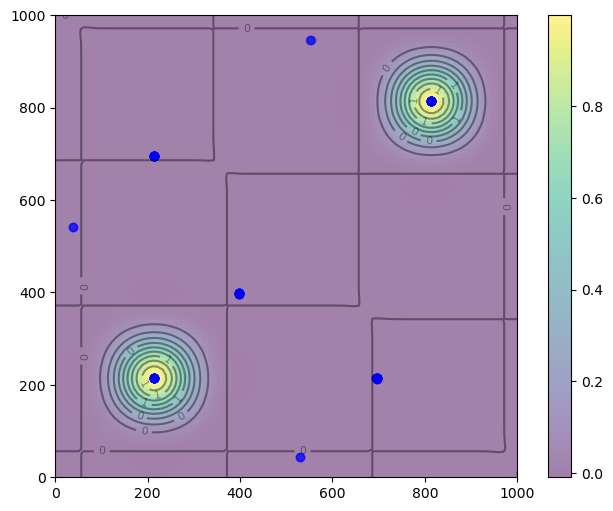

In [20]:
# Plotting - no Animation
x, y = np.array(np.meshgrid(np.linspace(lb, ub, 100), np.linspace(lb, ub, 100)))
z = fitness_function(x, y)

fig, ax = plt.subplots(figsize=(8, 6))
img = ax.imshow(z, extent=[lb, ub, lb, ub], origin='lower', cmap='viridis', alpha=0.5)
fig.colorbar(img, ax=ax)
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")

i = -1
ax.clear()
ax.imshow(z, extent=[lb, ub, lb, ub], origin='lower', cmap='viridis', alpha=0.5)
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
x_list = []
y_list = []
for j in range(n_fireflies):
    x_list.append(all_positions[i][j][0])
    y_list.append(all_positions[i][j][1])
p_plot = ax.scatter(x_list, y_list, marker='o', color='blue', alpha=0.5)
plt.show()

In [27]:
finalPositions = all_positions[-1]
ll = []
for j in range(n_fireflies):
    ll.append([finalPositions[j][0],finalPositions[j][1]])

# clusters_num = 4
# clusters = np.array([[228.3,228.3],[778.3,778.3]]) # 2 clusters
# clusters = np.array([[228.3,228.3],[778.3,228.3],[228.3,778.3],[778.3,778.3]]) # 2 clusters
# clusters = np.array([[214.15,214.15],[814.15,814.15]]) # 2 clusters
# clusters = np.array([[214.15,214.15],[214.15,514.15],[214.15,814.15],
#                      [514.15,214.15],[514.15,514.15],[514.15,814.15],
#                      [814.15,214.15],[814.15,514.15],[814.15,814.15]]) # 9 clusters
cluster_count = np.zeros(clusters_num)
radius = 50
for i in ll:
    for j in range(clusters_num):
        if np.linalg.norm(clusters[j]-i) <= radius:
            cluster_count[j] = cluster_count[j] + 1
print(clusters)
print(cluster_count)
print(sum(cluster_count))

[[214.15 214.15]
 [214.15 514.15]
 [214.15 814.15]
 [514.15 214.15]
 [514.15 514.15]
 [514.15 814.15]
 [814.15 214.15]
 [814.15 514.15]
 [814.15 814.15]]
[16. 12. 12. 11.  9.  9. 13.  9.  9.]
100.0


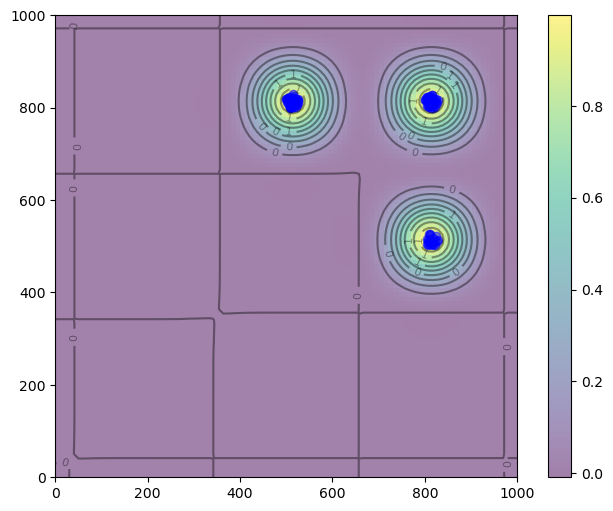

In [136]:
newPositions = pointDistribution([40,40,20],clusters,15)
# newPositions = pointDistribution([50,50],clusters,10)
# newPositions = pointDistribution([50,50],clusters,10)
# newPositions = pointDistribution([17,24,24,35],clusters,10)
# newPositions = pointDistribution([12,11,12,11,8,11,12,11,12],clusters,10)
# Plotting - no Animation
x, y = np.array(np.meshgrid(np.linspace(lb, ub, 100), np.linspace(lb, ub, 100)))
z = fitness_function(x, y)

fig, ax = plt.subplots(figsize=(8, 6))
img = ax.imshow(z, extent=[lb, ub, lb, ub], origin='lower', cmap='viridis', alpha=0.5)
fig.colorbar(img, ax=ax)
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")

ax.clear()
ax.imshow(z, extent=[lb, ub, lb, ub], origin='lower', cmap='viridis', alpha=0.5)
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
x_list = []
y_list = []
for j in range(n_fireflies):
    x_list.append(newPositions[j][0])
    y_list.append(newPositions[j][1])
p_plot = ax.scatter(x_list, y_list, marker='o', color='blue', alpha=0.5)
plt.show()

In [24]:
# RUnning a batch

emptyList = []

for itrators in range(30):
    # Initialize fireflies
    #fireflies = np.random.uniform(lb, ub, (n_fireflies, 2))
    fireflies = starting_points(n_fireflies)
    all_positions = [fireflies.copy()]
    intensities = np.array([fitness_function(x, y) for x, y in fireflies])

    # --- 4. Modified Firefly Algorithm Main Loop ---

    # Main optimization loop
    for t in range(max_iter):
        for i in range(n_fireflies):
            for j in range(n_fireflies):
                if intensities[j] > intensities[i]:
                    r = distance(fireflies[i], fireflies[j])
                    # beta = beta0 * transmission_function(r, TR)
                    beta = beta0 * np.exp(-1*gamma*(r**2))
                    rand = np.random.uniform(-0.5, 0.5, size=2)
                    fireflies[i] += beta * (fireflies[j] - fireflies[i]) + alpha * rand
                    fireflies[i] = np.clip(fireflies[i], lb, ub)
                    intensities[i] = fitness_function(fireflies[i][0], fireflies[i][1])
        all_positions.append(fireflies.copy())

    finalPositions = all_positions[-1]
    ll = []
    for j in range(n_fireflies):
        ll.append([finalPositions[j][0],finalPositions[j][1]])

    cluster_count = np.zeros(clusters_num)
    radius = 50
    for i in ll:
        for j in range(clusters_num):
            if np.linalg.norm(clusters[j]-i) <= radius:
                cluster_count[j] = cluster_count[j] + 1
    print(cluster_count)
    emptyList.append(cluster_count)

file_path = '9TargetsMFY.csv' # Remember to change every time

with open(file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerows(emptyList) # Use writerows for an iterable of rows

[11.  9. 11. 11.  9.  9. 14. 13. 13.]
[11.  0. 20. 11.  9.  9. 14. 12. 14.]
[13. 11. 12. 12.  9.  9. 15. 10.  9.]
[16. 12. 12. 12.  9.  9. 12.  9.  9.]
[13.  9.  9. 11.  9.  9. 16. 12. 12.]
[12.  9.  9. 12.  9.  9. 16. 12. 12.]
[16. 11. 13. 12.  9.  9. 12.  9.  9.]
[12.  9.  9. 12.  9.  9. 16. 12. 12.]
[11.  9. 10. 12.  9.  9. 16. 12. 12.]
[12. 12. 13. 11.  4. 12. 13. 13. 10.]
[15. 12. 13. 12.  9.  9. 12.  9.  9.]
[15. 12. 13. 12.  9.  9. 12.  9.  9.]
[11.  9. 11. 13. 10. 12. 12. 12. 10.]
[16. 11. 13. 12.  9.  9. 12.  9.  9.]
[13. 13. 11. 11.  5. 13. 13. 11. 10.]
[16. 12. 12. 11.  9.  9. 13.  9.  9.]
[16. 11. 13. 12.  9.  9. 12.  9.  9.]
[16. 11. 13. 12.  9.  9. 12.  9.  9.]
[16. 12. 12. 12.  9.  9. 12.  9.  9.]
[12.  9.  9. 12.  9.  9. 16. 12. 12.]
[16. 12. 12. 12.  9.  9. 12.  9.  9.]
[16. 12. 12. 11.  9.  9. 13.  9.  9.]
[16. 11. 13. 12.  9.  9. 12.  9.  9.]
[16. 12. 12. 11.  9.  9. 13.  9.  9.]
[16. 12. 12. 11.  9.  9. 13.  9.  9.]
[11.  9. 11. 11.  9.  9. 14. 12. 14.]
[16. 12. 12.